딥러닝 기초 스터디 / 박찬영

# 📌 4.1. ~ 4.2. 인공 신경망의 한계와 딥러닝 출현 / 딥러닝 구조

In [ ]:
import torch
import torch.nn

class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)  # 은닉층
        self.relu = torch.nn.ReLU(inplace=True)             # 활성화 함수
        self.out = torch.nn.Linear(n_hidden, n_output)      # 출력층
        self.softmax = torch.nn.Softmax(dim=n_output)        # 활성화 함수
    def forward(self, x):
        x = self.hidden(x)
        x = self.relu(x)
        x = self.out(x)
        x = self.softmax(x)
        return x

model = Net(n_feature=10, n_hidden=10, n_output=2)

In [ ]:
from torch.utils.data import DataLoader, Dataset

class CustomDataset(Dataset):
    def __init__(self):
        self.x_data = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
        self.y_data = [[12], [18], [11]]

    def __len__(self):
        return len(self.x_data)

    def __getitem__(self, idx):
        x = torch.FloatTensor(self.x_data[idx])
        y = torch.FloatTensor(self.y_data[idx])
        return x, y

dataset = CustomDataset()
dataloader = DataLoader(
    dataset, # 데이터셋
    batch_size=2, # 미니 배치 크기
    shuffle=True, # 데이터를 불러올 때마다 랜덤으로 섞기
)

In [ ]:
from torch import optim

optimizer = torch.optim.Adagrad(model.parameters(), lr=0.01)
optimizer = torch.optim.Adadelta(model.parameters(), lr=1.0) # 기본값 1.0
optimizer = torch.optim.RMSprop(model.parameters(), lr=0.01) # 기본값 1e-2
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9) # momentum 증가시키며 사용
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9, nesterov=True) # nesterov 기본값 False
optimizer = torch.optim.Adam(model.parameters(), lr=0.01) # 기본값 1e-3

\

---

\

### 📌 5.1. ~ 5.2. 합성곱 신경망 / 합성곱 신경망 맛보기

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


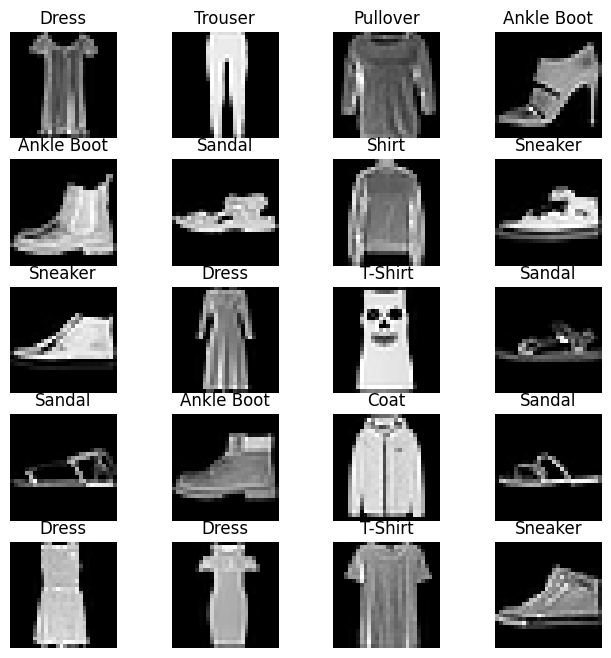

FashionCNN(
  (layer1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=2304, out_features=600, bias=True)
  (drop): Dropout2d(p=0.25, inplace=False)
  (fc2): Linear(in_features=600, out_features=120, bias=True)
  (fc3): Linear(in_features=120, out_features=10, bias=True)
)


/usr/local/lib/python3.11/dist-packages/torch/nn/functional.py:1538: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


Iteration: 500, Loss: 0.4200305938720703, Accuracy: 88.48999786376953%
Iteration: 1000, Loss: 0.31104207038879395, Accuracy: 86.73999786376953%
Iteration: 1500, Loss: 0.29161906242370605, Accuracy: 88.33999633789062%
Iteration: 2000, Loss: 0.21832174062728882, Accuracy: 89.37999725341797%
Iteration: 2500, Loss: 0.1388595998287201, Accuracy: 89.91999816894531%
Iteration: 3000, Loss: 0.2436719685792923, Accuracy: 89.25%


In [2]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn  # 딥러닝 모델 구성
from torch.autograd import Variable
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms # 데이터 전처리
from torch.utils.data import Dataset, DataLoader

from google.colab import drive
drive.mount("/content/drive")

import os
os.chdir("drive/MyDrive/프로메테우스 스터디")

# GPU 설정
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# 데이터 로드
train_dataset = torchvision.datasets.FashionMNIST("chap05/data", download=True,
                       transform=transforms.Compose([transforms.ToTensor()]))
test_dataset = torchvision.datasets.FashionMNIST("chap05/data", download=True,
                train=False, transform=transforms.Compose([transforms.ToTensor()]))

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=100)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=100)

labels_map = {0 : 'T-Shirt', 1 : 'Trouser', 2 : 'Pullover', 3 : 'Dress', 4 : 'Coat',
              5 : 'Sandal', 6 : 'Shirt', 7 : 'Sneaker', 8 : 'Bag', 9 : 'Ankle Boot'}

# 데이터 확인하기
fig = plt.figure(figsize=(8,8));
columns = 4;
rows = 5;
for i in range(1, columns*rows +1):
    img_xy = np.random.randint(len(train_dataset))
    img = train_dataset[img_xy][0][0,:,:]
    fig.add_subplot(rows, columns, i)
    plt.title(labels_map[train_dataset[img_xy][1]])
    plt.axis('off')
    plt.imshow(img, cmap='gray')
plt.show()

# 모델1
class FashionDNN(nn.Module):
    def __init__(self):  # 속성값 초기화 (객체 생성과 함께 호출)
        super(FashionDNN, self).__init__()  # 부모 클래스 상속
        self.fc1 = nn.Linear(in_features=784, out_features=256)  # 선형 회귀 모델
        self.drop = nn.Dropout(0.25)
        self.fc2 = nn.Linear(in_features=256, out_features=128)
        self.fc3 = nn.Linear(in_features=128, out_features=10)

    def forward(self, input_data):  # 순전파 학습 진행
        out = input_data.view(-1, 784)
        out = F.relu(self.fc1(out))
        out = self.drop(out)
        out = F.relu(self.fc2(out))
        out = self.fc3(out)
        return out

# 모델2
class FashionCNN(nn.Module):
    def __init__(self):
        super(FashionCNN, self).__init__()
        self.layer1 = nn.Sequential(  # nn.Sequential : 네트워크 모델 정의
            nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1),  # 채널 = 깊이
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.fc1 = nn.Linear(in_features=64*6*6, out_features=600)
        self.drop = nn.Dropout2d(0.25)
        self.fc2 = nn.Linear(in_features=600, out_features=120)
        self.fc3 = nn.Linear(in_features=120, out_features=10)  # 마지막 계층의 out_features = 클래스 개수

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)
        out = self.fc1(out)
        out = self.drop(out)
        out = self.fc2(out)
        out = self.fc3(out)
        return out

# 손실 함수, 학습률, 옵티마이저 정의
learning_rate = 0.001
model = FashionCNN()
model.to(device)

criterion = nn.CrossEntropyLoss()  # 분류 문제 손실 함수
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
print(model)

# 모델 학습
num_epochs = 5
count = 0
loss_list = []
iteration_list = []
accuracy_list = []

predictions_list = []
labels_list = []

for epoch in range(num_epochs):
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        # torch.autograd.Variable 이용해 역전파를 위한 미분 값 자동 계산
        train = Variable(images.view(100, 1, 28, 28))
        labels = Variable(labels)

        outputs = model(train)  # 학습 데이터를 모델에 적용
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        count += 1

        if not (count % 50):
            total = 0
            correct = 0
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)  # GPU 사용
                labels_list.append(labels)
                test = Variable(images.view(100, 1, 28, 28))
                outputs = model(test)
                predictions = torch.max(outputs, 1)[1].to(device)
                predictions_list.append(predictions)
                correct += (predictions == labels).sum()
                total += len(labels)

            accuracy = correct * 100 / total # 정확도
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)

        if not (count % 500):
            print("Iteration: {}, Loss: {}, Accuracy: {}%".format(count, loss.data, accuracy))

\

---

\

# 📌 5.3. ~ 5.5. 전이 학습 / 설명 가능한 CNN / 그래프 합성곱 네트워크

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
385


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


conv1.weight tensor([[[[-1.0419e-02, -6.1356e-03, -1.8098e-03,  ...,  5.6615e-02,
            1.7083e-02, -1.2694e-02],
          [ 1.1083e-02,  9.5276e-03, -1.0993e-01,  ..., -2.7124e-01,
           -1.2907e-01,  3.7424e-03],
          [-6.9434e-03,  5.9089e-02,  2.9548e-01,  ...,  5.1972e-01,
            2.5632e-01,  6.3573e-02],
          ...,
          [-2.7535e-02,  1.6045e-02,  7.2595e-02,  ..., -3.3285e-01,
           -4.2058e-01, -2.5781e-01],
          [ 3.0613e-02,  4.0960e-02,  6.2850e-02,  ...,  4.1384e-01,
            3.9359e-01,  1.6606e-01],
          [-1.3736e-02, -3.6746e-03, -2.4084e-02,  ..., -1.5070e-01,
           -8.2230e-02, -5.7828e-03]],

         [[-1.1397e-02, -2.6619e-02, -3.4641e-02,  ...,  3.2521e-02,
            6.6221e-04, -2.5743e-02],
          [ 4.5687e-02,  3.3603e-02, -1.0453e-01,  ..., -3.1253e-01,
           -1.6051e-01, -1.2826e-03],
          [-8.3730e-04,  9.8420e-02,  4.0210e-01,  ...,  7.0789e-01,
            3.6887e-01,  1.2455e-01],
       

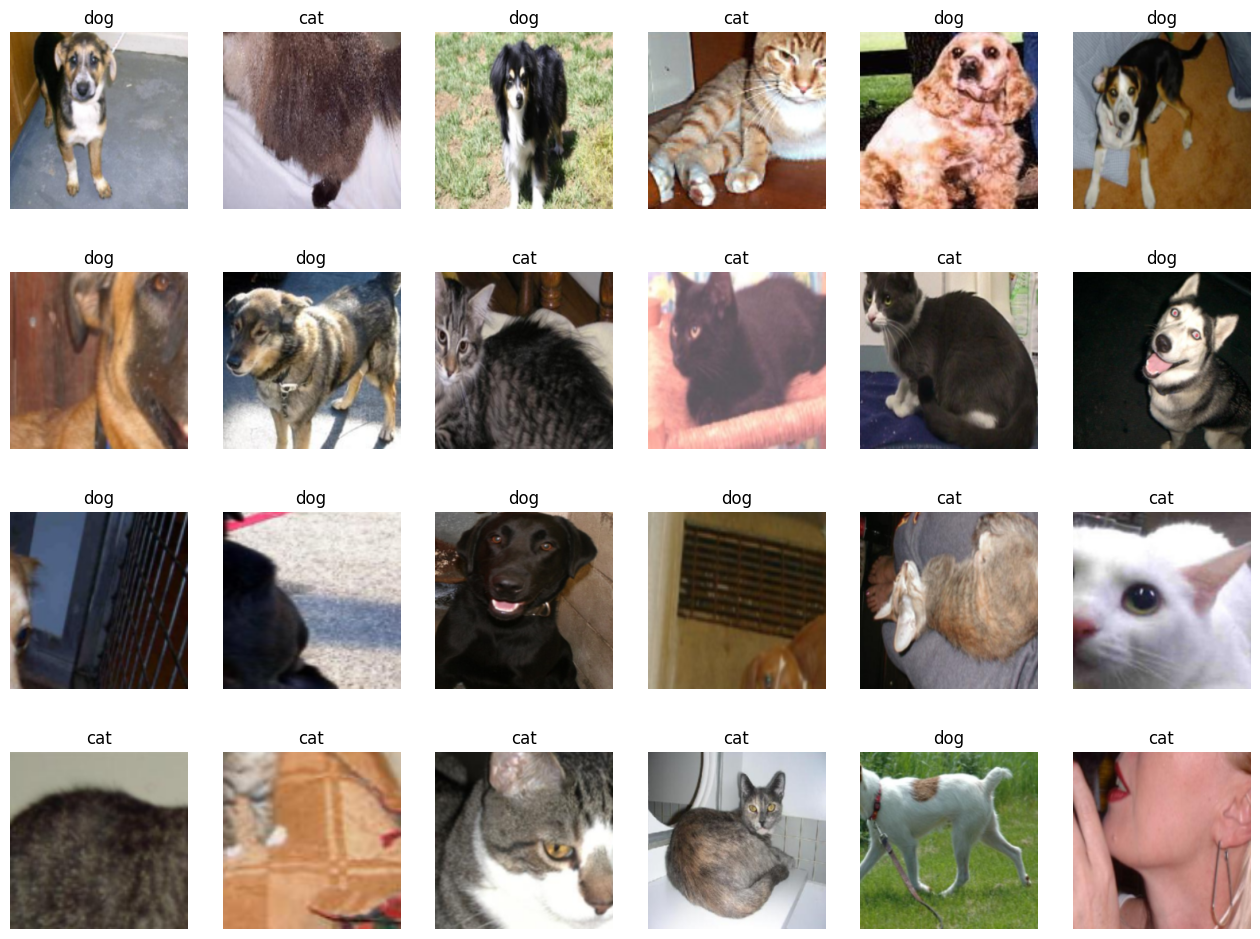

In [11]:
!pip install opencv-python

import os
import time
import copy
import glob
import cv2  # 라이브러리
import shutil

import torch
import torchvision  # 컴퓨터 비전(computer vision) 용도의 패키지
import torchvision.transforms as transforms  # 데이터 전처리 패키지
import torchvision.models as models  # 파이토치 네트워크 패키지
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt

from google.colab import drive
drive.mount("/content/drive")

import os
os.chdir("drive/MyDrive/프로메테우스 스터디")

# 데이터 받아오기
data_path = 'chap05/data/catanddog/train'

transform = transforms.Compose([
                transforms.Resize([256, 256]),  # 이미지 크기 조정
                transforms.RandomResizedCrop(224),  # 이미지를 랜덤한 크기 및 비율로 자르기 (데이터 확장 용도)
                transforms.RandomHorizontalFlip(),  # 랜덤하게 수평으로 뒤집기
                transforms.ToTensor()
])
train_dataset = torchvision.datasets.ImageFolder(
                data_path,  # 불러올 대상(경로)
                transform=transform  # 불러올 방법
)
train_loader = torch.utils.data.DataLoader(
               train_dataset,
               batch_size=32,  # 한 번에 불러올 데이터 양
               #  num_workers=8,  # 하위 프로세스 개수 (데이터 불러올 때)
               shuffle=True  # 데이터 무작위로 섞기
)
print(len(train_dataset))

# 데이터 출력해보기
samples, labels = next(iter(train_loader))
classes = {0:'cat', 1:'dog'}  # 레이블
fig = plt.figure(figsize=(16,24))
for i in range(24):  # 24개 이미지
    a = fig.add_subplot(4,6,i+1)
    a.set_title(classes[labels[i].item()])  # 레이블 정보(클래스) 함께 출력
    a.axis('off')
    a.imshow(np.transpose(samples[i].numpy(), (1,2,0)))  # 행렬 차원 바꾸기
plt.subplots_adjust(bottom=0.2, top=0.6, hspace=0)

# 사전 학습된 모델
model = models.resnet18(pretrained=True)  # pretrained=True : 사전 학습된 가중치 사용

for name, param in model.named_parameters():  # 모델 파라미터 값
    if param.requires_grad:
        print(name, param.data)

# 완전연결층
model.fc = nn.Linear(512, 2)  # 2개 클래스

for param in model.parameters():  # 합성곱층 가중치 고정
    param.requires_grad = False  # 역전파 중 파라미터 변화 계산 X

for param in model.fc.parameters():  # 완전연결층 학습
    param.requires_grad = True

optimizer = torch.optim.Adam(model.fc.parameters())
cost = torch.nn.CrossEntropyLoss()  # 손실 함수
print(model)

# 모델 훈련
def train_model(model, dataloaders, criterion, optimizer, device, num_epochs=13, is_train=True):
    since = time.time()  # 컴퓨터의 현재 시각
    acc_history = []
    loss_history = []
    best_acc = 0.0

    for epoch in range(num_epochs):  # 에포크만큼 반복
        print('Epoch {}/{}'.format(epoch, num_epochs-1))
        print('-' * 10)

        running_loss = 0.0
        running_corrects = 0

        for inputs, labels in dataloaders:  # 데이터로더에 전달된 데이터만큼 반복
            inputs = inputs.to(device)
            labels = labels.to(device)

            model.to(device)
            optimizer.zero_grad()  # 기울기를 0으로 설정
            outputs = model(inputs)  # 순전파 학습
            loss = criterion(outputs, labels)
            _, preds = torch.max(outputs, 1)
            loss.backward()  # 역전파 학습
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)  # 출력 결과와 레이블의 오차 누적
            running_corrects += torch.sum(preds == labels.data)  # 출력 결과와 레이블이 동일한지 확인한 결과 누적

        epoch_loss = running_loss / len(dataloaders.dataset)  # 평균 오차
        epoch_acc = running_corrects.double() / len(dataloaders.dataset)  # 평균 정확도

        print('Loss: {:.4f} Acc: {:.4f}'.format(epoch_loss, epoch_acc))

        if epoch_acc > best_acc:
           best_acc = epoch_acc

        acc_history.append(epoch_acc.item())
        loss_history.append(epoch_loss)
        torch.save(model.state_dict(), os.path.join('chap05/data/catanddog/',  '{0:0=2d}.pth'.format(epoch)))
        print()

    time_elapsed = time.time() - since # 실행 시간(학습 시간)
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best Acc: {:4f}'.format(best_acc))
    return acc_history, loss_history  # 정확도, 오차

params_to_update = []
for name, param in model.named_parameters():
    if param.requires_grad == True:
        params_to_update.append(param)  # 파라미터 학습 결과 저장
        print("\t", name)

optimizer = optim.Adam(params_to_update)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
criterion = nn.CrossEntropyLoss()
train_acc_hist, train_loss_hist = train_model(model, train_loader, criterion, optimizer, device)

98
Loading model chap05/data/catanddog/00.pth
Acc: 0.8878

Validation complete in 0m 1s
Best Acc: 0.887755


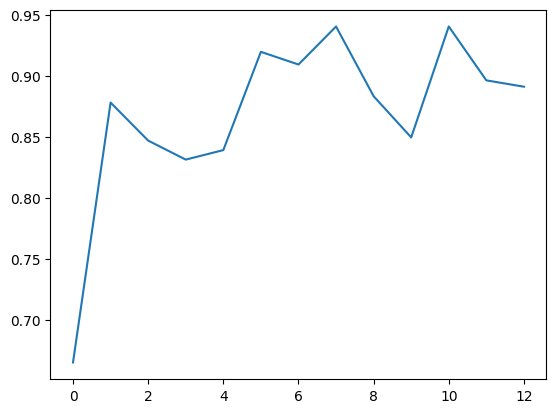

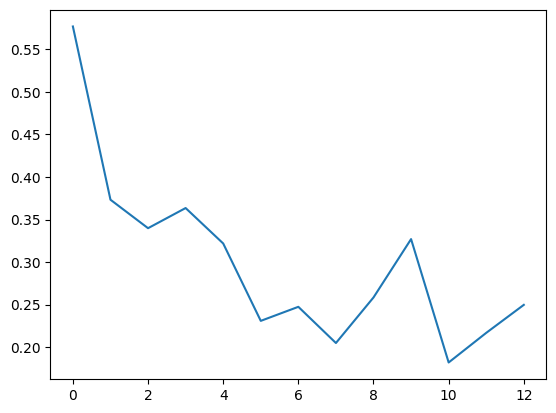

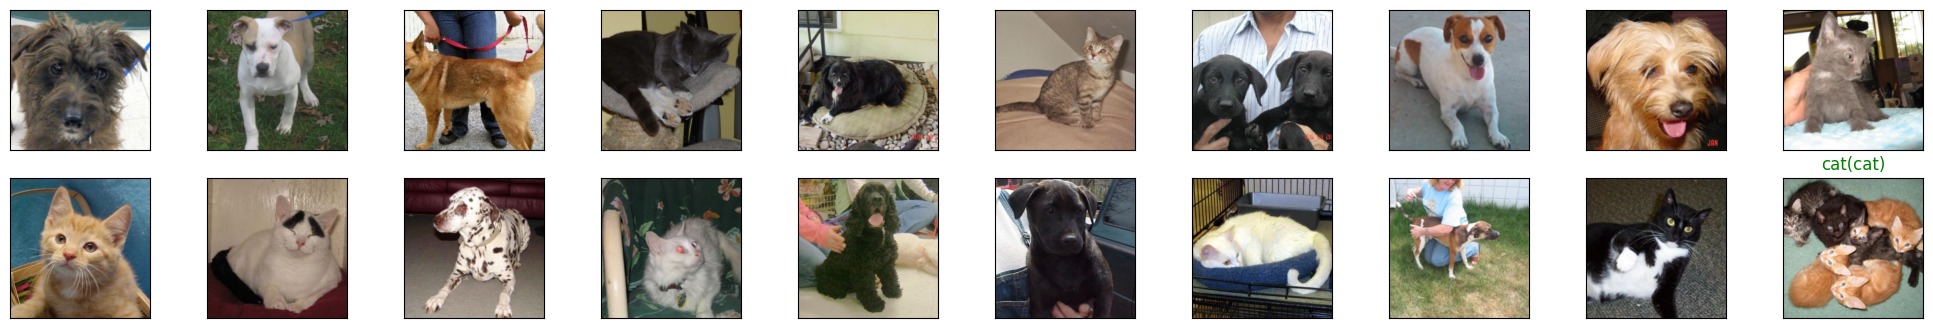

<Figure size 640x480 with 0 Axes>

In [14]:
test_path = 'chap05/data/catanddog/test'

transform = transforms.Compose([
                transforms.Resize(224),
                transforms.CenterCrop(224),
                transforms.ToTensor(),
])
test_dataset = torchvision.datasets.ImageFolder(
    root=test_path,
    transform=transform
)
test_loader = torch.utils.data.DataLoader(
    test_dataset,
    batch_size=32,
    num_workers=1,
    shuffle=True
)

print(len(test_dataset))

def eval_model(model, dataloaders, device):
    since = time.time()
    acc_history = []
    best_acc = 0.0

    saved_models = glob.glob('chap05/data/catanddog/' + '*.pth')  # 원하는 파일 추출
    saved_models.sort()
    # print('saved_model', saved_models)

    for model_path in saved_models:
        print('Loading model', model_path)

        model.load_state_dict(torch.load(model_path))
        model.eval()
        model.to(device)
        running_corrects = 0

        for inputs, labels in dataloaders:  # 테스트 반복
            inputs = inputs.to(device)
            labels = labels.to(device)

            with torch.no_grad():  # autograd 사용 X
                 outputs = model(inputs)

            _, preds = torch.max(outputs.data, 1)  # 배열의 최댓값이 들어 있는 인덱스
            preds[preds >= 0.5] = 1  # >= 0.5 : 올바르게 예측
            preds[preds < 0.5] = 0  # < 0.5 : 틀리게 예측
            running_corrects += preds.eq(labels).int().sum()

        epoch_acc = running_corrects.double() / len(dataloaders.dataset)  # 정확도 계산
        print('Acc: {:.4f}'.format(epoch_acc))

        if epoch_acc > best_acc:
            best_acc = epoch_acc
            acc_history.append(epoch_acc.item())
            print()

        time_elapsed = time.time() - since
        print('Validation complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
        print('Best Acc: {:4f}'.format(best_acc))

        return acc_history  # 계산된 정확도

val_acc_hist = eval_model(model, test_loader, device)

plt.plot(train_acc_hist)
plt.plot(val_acc_hist)
plt.show()
plt.plot(train_loss_hist)
plt.show()

def im_convert(tensor):
    # tensor.clone() :  기존 텐서 내용 복사한 텐서 생성
    # tensor.detach() : 기존 텐서에서 기울기가 전파되지 않는 텐서
    # numpy.clip(start, end) : 입력 값을 특정 범위로 제한
    image = tensor.clone().detach().numpy()
    image = image.transpose(1, 2, 0)
    image = image * (np.array((0.5,0.5,0.5)) + np.array((0.5,0.5,0.5)))
    image = image.clip(0, 1)
    return image

classes = {0:'cat', 1:'dog'}

dataiter = iter(test_loader)  # 테스트 데이터셋
images, labels = next(dataiter)
output = model(images.to(device))
_, preds = torch.max(output, 1)

fig = plt.figure(figsize=(25,4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
    plt.imshow(im_convert(images[idx]))
    a.set_title(classes[labels[i].item()])
ax.set_title("{}({})".format(str(classes[preds[idx].item()]), str(classes[labels[idx].
             item()])), color=("green" if preds[idx]==labels[idx] else "red"))
plt.show()
plt.subplots_adjust(bottom=0.2, top=0.6, hspace=0)

In [ ]:
!pip install mxnet
!pip install --user mxnet

import matplotlib.pyplot as plt
import mxnet as mx
from mxnet.gluon.data.vision import transforms

example_image = mx.image.imread("chap05/data/cat.jpg")
plt.imshow(example_image.asnumpy())

def show_images(imgs, num_rows, num_cols, scale=2):
    aspect_ratio = imgs[0].shape[0]/imgs[0].shape[1]  # 확장할 이미지의 크기 조정
    figsize = (num_cols * scale, num_rows * scale * aspect_ratio)
    _, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    for i in range(num_rows):
        for j in range(num_cols):
            axes[i][j].imshow(imgs[i * num_cols + j].asnumpy())
            axes[i][j].axes.get_xaxis().set_visible(False)
            axes[i][j].axes.get_yaxis().set_visible(False)
    plt.subplots_adjust(hspace=0.1, wspace=0)
    return axes

def apply(img, aug, num_rows=2, num_cols=4, scale=3):
    Y = [aug(img) for _ in range(num_rows * num_cols)]  # 데이터 확장 적용
    show_images(Y, num_rows, num_cols, scale)

shape_aug = transforms.RandomResizedCrop(size=(200, 200),
                                         scale=(0.1, 1),
                                         ratio=(0.5, 2))
apply(example_image, shape_aug)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
torch.Size([1, 3, 100, 100])


<ipython-input-3-381b0e5054bb>:90: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


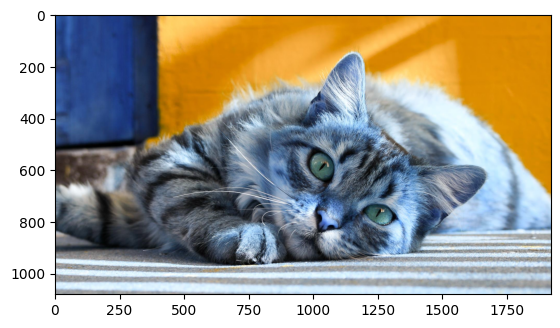

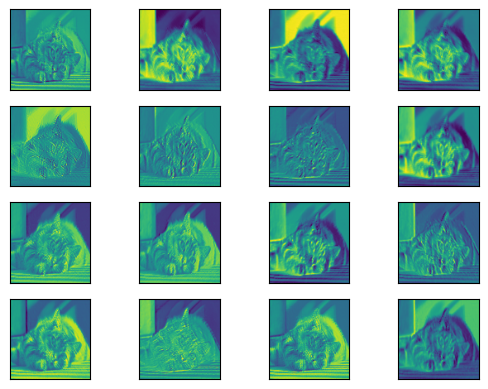

<Figure size 1200x800 with 0 Axes>

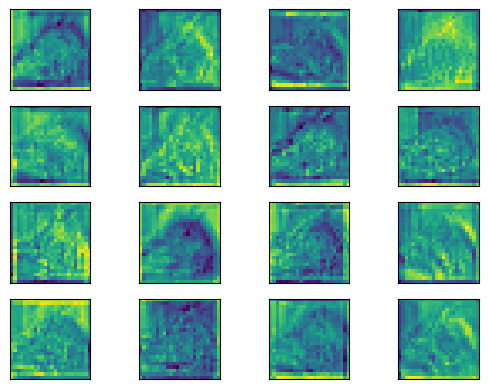

<Figure size 1200x800 with 0 Axes>

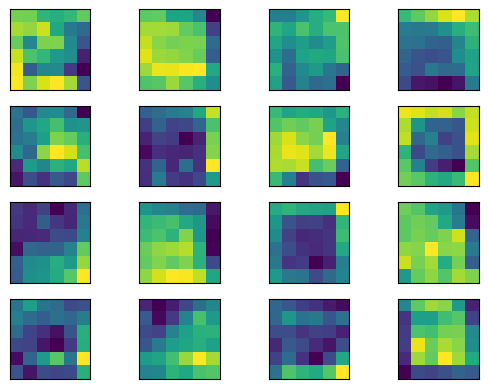

<Figure size 1200x800 with 0 Axes>

In [3]:
!pip install pillow

import matplotlib.pyplot as plt
from PIL import Image
import cv2
import torch
import torch.nn.functional as F
import torch.nn as nn
from torchvision.transforms import ToTensor
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class XAI(torch.nn.Module):
    def __init__(self, num_classes=2):
        super(XAI, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),  # inplace=True는 기존의 데이터를 연산의 결괏값으로 대체하는 것을 의미
            nn.Dropout(0.3),
            nn.Conv2d(64, 64, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(64, 128, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.Dropout(0.4),
            nn.Conv2d(128, 128, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(128, 256, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.Dropout(0.4),
            nn.Conv2d(256, 256, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.Dropout(0.4),
            nn.Conv2d(256, 256, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(256, 512, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.Dropout(0.4),
            nn.Conv2d(512, 512, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.Dropout(0.4),
            nn.Conv2d(512, 512, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(512, 512, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.Dropout(0.4),
            nn.Conv2d(512, 512, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.Dropout(0.4),
            nn.Conv2d(512, 512, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.classifier = nn.Sequential(
            nn.Linear(512, 512, bias=False),
            nn.Dropout(0.5),
            nn.BatchNorm1d(512),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(512, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(-1, 512)
        x = self.classifier(x)
        return F.log_softmax(x)  # Softmax의 기울기 소멸 문제를 해결하고자 로그 값을 취한 것

model = XAI()  # model이라는 이름의 객체를 생성
model.to(device)
model.eval()

class LayerActivations:
    features = []
    def __init__(self, model, layer_num):
        # Hook : 각 계층의 활성화 함수 및 기울기 값 확인
        # register_forward_hook : 각 네트워크 모듈의 입출력 가져오기 (순전파 중)
        self.hook = model[layer_num].register_forward_hook(self.hook_fn)

    def hook_fn(self, module, input, output):
        self.features = output.detach().numpy()

    def remove(self):  # hook 삭제
        self.hook.remove()

from google.colab import drive
drive.mount("/content/drive")

import os
os.chdir("drive/MyDrive/프로메테우스 스터디")

img = cv2.imread("chap05/data/cat.jpg")
plt.imshow(img)
img = cv2.resize(img, (100,100), interpolation=cv2.INTER_LINEAR)
img = ToTensor()(img).unsqueeze(0)
print(img.shape)

result = LayerActivations(model.features, 0)  # 0번째 Conv2d 특성 맵 확인

model(img.to(device))
activations = result.features

fig, axes = plt.subplots(4, 4)
fig = plt.figure(figsize=(12,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for row in range(4):
    for column in range(4):
        axis = axes[row][column]
        axis.get_xaxis().set_ticks([])
        axis.get_yaxis().set_ticks([])
        axis.imshow(activations[0][row*10+column])
plt.show()

result = LayerActivations(model.features, 20)  # 20번째 Conv2d 특성 맵 확인

model(img)
activations = result.features

fig, axes = plt.subplots(4, 4)
fig = plt.figure(figsize=(12,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for row in range(4):
    for column in range(4):
        axis = axes[row][column]
        axis.get_xaxis().set_ticks([])
        axis.get_yaxis().set_ticks([])
        axis.imshow(activations[0][row*10+column])
plt.show()

result = LayerActivations(model.features, 40)  # 40번째 Conv2d 특성 맵 확인

model(img)
activations = result.features

fig, axes = plt.subplots(4, 4)
fig = plt.figure(figsize=(12,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for row in range(4):
    for column in range(4):
        axis = axes[row][column]
        axis.get_xaxis().set_ticks([])
        axis.get_yaxis().set_ticks([])
        axis.imshow(activations[0][row*10+column])
plt.show()